# ¿Que tan felices fuimos los peruanos en el último quindenio?

## TABLA DE CONTENIDO:

1. [Introducción](#introducción)
2. [Importar librerias](#paragraph1) 
3. [Configuraciones generales](#paragraph2) 
4. [Qué hace a un país feliz?](#paragraph3)
    4.1 [Importando datos](#subparagraph1)  
    4.2 [Dataframe de inicio](#subparagraph2)
    4.3 [Dataframe para América latina y El Caribe](#subparagraph3) 
    4.4 [Dataframe para Sudamérica](#subparagraph4)
    4.5 [Dataframe para el Perú](#subparagraph5)
5. [Bonus: Trabajando con Formato Ancho - Mapa de Calor del Indice de Felicidad](#paragraph4)
6. [Principales hallazgos](#paragraph5)

## 1. Introducción

Este trabajo es la continuación de una entrega anterior ["Perú: Felicidad y Covid"](https://github.com/FigueroaAsenciosCarlos/Felicidad-y-Covid-en-el-Peru),basado en cifras de 2021. Uno de los principales resultados obtenidos es que en el último año la felicidad en Sudamerica, y lo propio en el Perú, medido por el Indice de Felicidad (World Happiness Report Index), está asociada a la vacunación de la población en primer lugar y luego a los ingresos, vía PBI percapita. Variables con menor correlación fueron la libertad de tomar decisiones de vida y las percepciones de corrupción. El apoyo social y la generosidad, por su parte, tienen una correlación muy baja con la felicidad, contrario a lo que podía esperarse.
Lo que haremos ahora es revisar la evolución del Indice de Felicidad en Sudamerica y en el Perú para el periodo 2006 - 2021, nos interesa conocer el comportamiento del Indice de Felicidad y de sus principales variables asociadas en un periodo largo de tiempo, de tal forma que podamos establecer si los datos recientes se asocian a la pandemia o es algo que ya tenía una tendencia.
El punto de partida con respecto a los datos utilizados es el trabajo de [emresengul](https://www.kaggle.com/emresengul/plotly-beginner-friendly-eda-happiness-report/notebook), a partir del cual (dataframe = df) haremos las trasformaciones necesarias para obtener la información requerida.

<font color = red>Nota</font>: Hay dos gráficos interactivos que probablemente no se puedan visualizar directamente desde el repositorio, se puede hacer desde un nuevo notebook pegando el código correspondiente, sin embargo, presentamos también las opciones estáticas. Sigo averiguando como publicar gráficos de plotly.  

## 2. Importar librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl

In [3]:
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

## 3. Configuraciones generales

In [4]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config IPCompleter.greedy = True

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

sns.set_palette("bright")
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(30,30)})

## 4. Qué hace a un pais feliz?

### ***4.1 Importando los datos***

In [65]:
df = pd.read_csv("lacwhanual.csv")
pd.set_option('display.max_columns', None)

### ***4.2 Dataframe de inicio*** 

El dataframe df es nuestro punto de partida. Lo utilizamos debido al excelente trabajo de limpieza y concatenación realizado por emresengul con las bases de datos originales, lo cual es un considerable ahorro de tiempo.  

In [67]:
df.head(3).style.background_gradient()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
0,Afghanistan,2008,3.724000,7.370000,0.451000,50.800000,0.718000,0.168000,0.882000,South Asia
1,Afghanistan,2009,4.402000,7.540000,0.552000,51.200000,0.679000,0.190000,0.850000,South Asia
2,Afghanistan,2010,4.758000,7.647000,0.539000,51.600000,0.600000,0.121000,0.707000,South Asia


<div class =" alert alert-danger "> Hay 161 paises en el dataframe de partida </div>

In [71]:
y = df['Country name'].value_counts(sort=['year'])

In [73]:
y.shape

(161,)

### ***4.3 Dataframe de América Latina y el Caribe***

LAC es nuestra dataframe para America Latina y El Caribe.

In [74]:
LAC = df[df["Regional indicator"] == "Latin America and Caribbean"].reset_index(drop = True)
LAC.head(3).style.background_gradient()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
0,Argentina,2006,6.313000,9.942000,0.938000,66.820000,0.733000,-0.157000,0.852000,Latin America and Caribbean
1,Argentina,2007,6.073000,10.018000,0.862000,66.940000,0.653000,-0.141000,0.881000,Latin America and Caribbean
2,Argentina,2008,5.961000,10.048000,0.892000,67.060000,0.678000,-0.132000,0.865000,Latin America and Caribbean


In [51]:
LAC.shape

(299, 10)

<div class = "alert alert-success"> Hay 20 paises en America Latina y El Caribe </div>

In [77]:
y = LAC['Country name'].value_counts(sort=['year'])
y.shape

(20,)

In [79]:
LAC = LAC.sort_values(by="Life Ladder")

### ***4.4 Dataframe para Sudamerica***

Se deben eliminar los registros de los paises de Centroamerica y El Caribe a partir de los indices de los registros de cada país', lo cual es útil considerando que es una base de datos de formato largo.

In [81]:
c = ['Panama', 'Costa Rica', 'Mexico', 'Guatemala', 'Jamaica',
     'Dominican Republic', 'Honduras', 'Nicaragua', 'Haiti', 'El Salvador']
for i in c:
    LAC = LAC.drop(LAC.loc[LAC['Country name'] == i].index)
LAC.shape

(157, 10)

<div class =" alert alert-danger "> Se constata que son 10 los paises de Sudametica </div> 

In [83]:
z = LAC['Country name'].value_counts(sort=['year'])
z.shape

(10,)

In [56]:
LAC.head().style.background_gradient()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
274,Venezuela,2016,4.041000,9.010000,0.902000,66.100000,0.458000,-0.155000,0.890000,Latin America and Caribbean
278,Venezuela,2020,4.574000,9.448769,0.805000,66.900000,0.612000,-0.164583,0.811000,Latin America and Caribbean
222,Paraguay,2006,4.730000,9.088000,0.895000,63.620000,0.691000,0.066000,0.841000,Latin America and Caribbean
235,Peru,2006,4.811000,8.989000,0.875000,65.340000,0.668000,-0.071000,0.895000,Latin America and Caribbean
297,Venezuela,2021,4.892000,9.073000,0.861000,66.700000,0.615000,-0.169000,0.827000,Latin America and Caribbean


#### Gráficos de interés

In [120]:
LAC = LAC.sort_values(["Country name", "year"])

css3_colors = ['#add8e6', '#f08080', '#e0ffff', '#fafad2',
               '#d3d3d3', '#90ee90', '#ffb6c1', '#ffa07a', '#20b2aa', '#87cefa']
css3_dict = {}
i = 0
for name in LAC["Country name"].unique():
    css3_dict[name] = css3_colors[i]
    i += 1


fig = go.Figure()
for name in LAC['Country name'].unique():
    fig.add_trace(go.Scatter(
        x=LAC[LAC['Country name'] == name]['year'],
        y=LAC[LAC['Country name'] == name]['Life Ladder'],
        name=name,
        mode='markers+text+lines',
        marker_color='black',
        line=dict(color=css3_dict[name]),
        marker_size=3,
        yaxis='y1'))

fig.update_layout(
    title="Indice de Felicidad Tendencia en Sudamerica 2006-2021 ",
    xaxis_title="Año",
    yaxis_title='Indice de Felicidad',
    template='plotly_dark',
    font=dict(
        size=14,
        color="White",
        family="Oswald', sans-serif"
    ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)
fig.show()

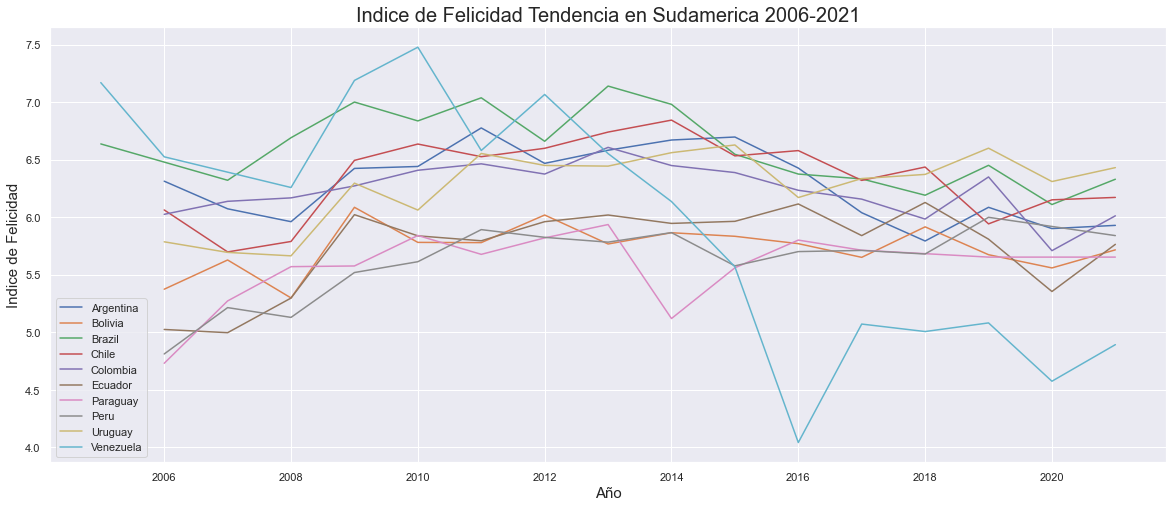

In [14]:
sns.set_style('darkgrid')

LAC = LAC.sort_values(["Country name", "year"])

css3_colors = ['#add8e6', '#f08080', '#e0ffff', '#fafad2',
               '#d3d3d3', '#90ee90', '#ffb6c1', '#ffa07a', '#20b2aa', '#87cefa']
css3_dict = {}
i = 0
for name in LAC["Country name"].unique():
    css3_dict[name] = css3_colors[i]
    i += 1


fig, ax = plt.subplots()
for name in LAC['Country name'].unique():
    ax.plot(
        LAC[LAC['Country name'] == name]['year'],
        LAC[LAC['Country name'] == name]['Life Ladder']),

ax.figure.set_size_inches(20, 8)
ax.set_xlabel('Año', size=15)  # Add an x-label to the axes.
ax.set_ylabel('Indice de Felicidad', size=15)  # Add a y-label to the axes.
# Add a title and legend to the axes.
ax.set_title("Indice de Felicidad Tendencia en Sudamerica 2006-2021", size=20)
ax.legend(css3_dict);

Tal como puede observarse en los gráficos previos (mejor aun en el dinámico), todos los paises excepto Chile tuvieron una caida en el Indice de Felicidad en el primer año de pandemia (de 2019 al 2020). Para el segundo año todos los paises excepto Perú mejoraron su score de felicidad (véase el trabajo previo para una mayor explicación al respecto; el link está en la Introducción).
Otro dato interesante, es que al inicio del quindenio (2006) había una gran dispersión en los score de felicidad entre los países, fluctuaban en un rango entre 4.73 y 6.53, lo que se fue reduciendo y concentrando en el tiempo, es así que el 2021 el rango va de 6.43 a 5.65, sin considerar a Venezuela que, a pesar de su mejora en el último año está en 4.89 muy por debajo del 7.17 que tuvo el 2005 y algo mejor al 4.04 del 2016, su peor año.

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=LAC.groupby("Country name").mean().sort_values(by="Life Ladder").index,
    y=LAC.groupby("Country name").mean().sort_values(
        by="Life Ladder")["Life Ladder"],
    name='Happines Score',
    mode='markers+text',
    marker_color='red',
    marker_size=10,
    textposition='top center',
    line=dict(color='red', dash='dash'),
))
fig.update_layout(
    title="<b>Sudamerica: Indice de Felicidad - Media anual 2006-2021</b>",
    xaxis_title="<b>País</b>",
    yaxis_title="<b>Indice de Felicidad</b>",
    template='plotly_dark',
    font=dict(
        size=12,
        color="White",
        family="Oswald', sans-serif",
    ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    yaxis2=dict(showgrid=True, overlaying='y', side='right',
                title='<b>Indice de Felicidad</b>'),
)

fig.show()

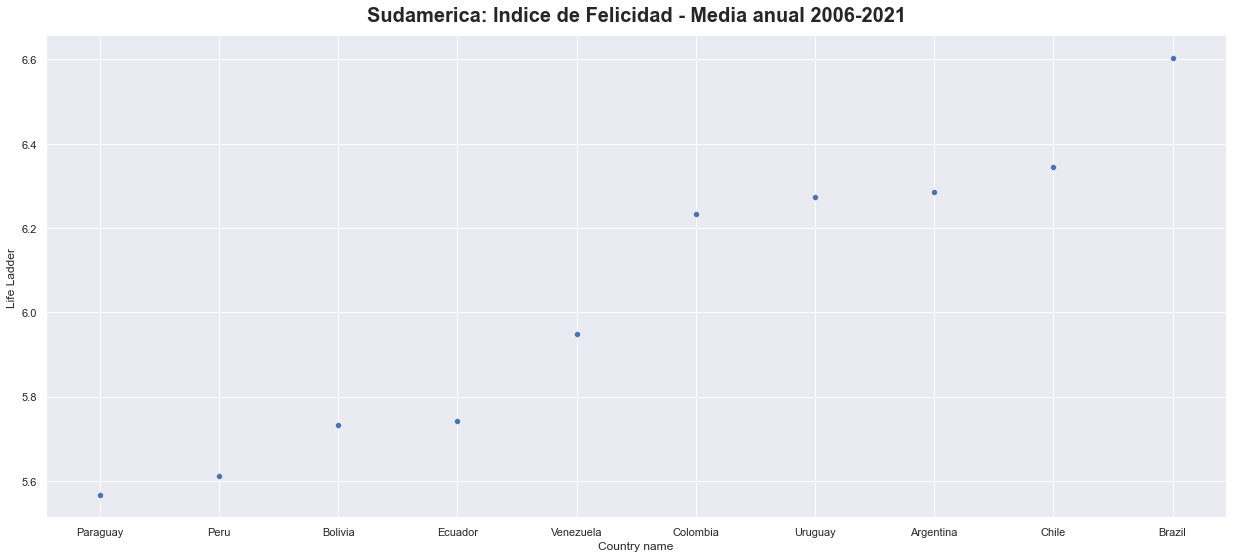

In [17]:
sns.set_style('darkgrid')
# plt.style.use("seaborn-dark")
ax = sns.relplot(x=LAC.groupby("Country name").mean().sort_values(by="Life Ladder").index, y=LAC.groupby("Country name").mean().sort_values(
    by="Life Ladder")["Life Ladder"], marker="o")
ax.figure.set_size_inches(20, 8)
plt.title('Sudamerica: Indice de Felicidad - Media anual 2006-2021',
          fontsize=20, fontweight='bold', pad=15)

La media anual del Indice de Felicidad del quindenio pone las cosas claras para cada país. Es así como Brasil es largamente el país más feliz de Sudamerica. El Perú por el contrario, junto a Paraguay, está en la cola. Venezuela lidera el segundo pelotón debido a sus mejores años iniciales, pero cae estrepitosamente entre 2012 y 2016.

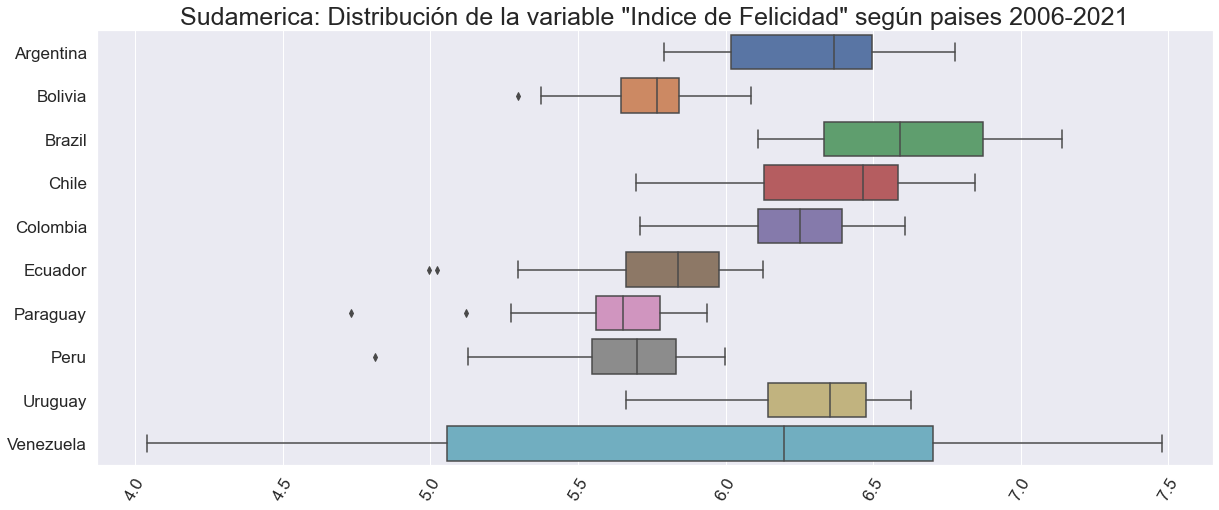

In [18]:
plt.figure(figsize=(20, 8))

sns.set_style('darkgrid')
boxplot = sns.boxplot(x='Life Ladder', y='Country name', data=LAC)
boxplot.set(xlabel='', ylabel='')
plt.title('Sudamerica: Distribución de la variable "Indice de Felicidad" según paises 2006-2021', fontsize=25)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

La distribución de los datos anuales del Indice de Felicidad en cada país es un buen termómetro de cuan estable o inestable son esas cifras. Lo que puede deberse a cuan sensibles a otras variables lo son, o a la fluctuación de las variables asociadas. Lo cierto es que Venezuela es nuevamente el caso extremo, el score de Felicidad es muy fluctuante (tamaño de la barra), seguido por Chile, Brasil y Argentina, curiósamente los tres países con mayor felicidad promedio en el periodo. Paises como Paraguay, Perú y Bolivia tienen mas bien cifras de felicidad con menos fluctuación, siendo al mismo tiempo los paises con menor score del quindenio. Podría decirse entonces que los mayores score promedio en la felicidad se da en aquellos paises con mayores variaciones del Indice (excepto Venezuela), en donde además su valor mínimo es mayor que la mediana de Perú y Paraguay.

### ***4.5 Dataframe para Perú***

In [85]:
peru = LAC[LAC["Country name"] == "Peru"].reset_index(drop=True)

In [118]:
peru.style.background_gradient()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
0,Peru,2006,4.811000,8.989000,0.875000,65.340000,0.668000,-0.071000,0.895000,Latin America and Caribbean
1,Peru,2007,5.214000,9.063000,0.756000,65.580000,0.638000,-0.078000,0.931000,Latin America and Caribbean
2,Peru,2008,5.129000,9.142000,0.777000,65.820000,0.638000,-0.067000,0.896000,Latin America and Caribbean
3,Peru,2009,5.519000,9.145000,0.799000,66.060000,0.638000,-0.079000,0.880000,Latin America and Caribbean
4,Peru,2010,5.613000,9.217000,0.812000,66.300000,0.757000,-0.060000,0.881000,Latin America and Caribbean
5,Peru,2011,5.892000,9.270000,0.756000,66.480000,0.773000,-0.123000,0.824000,Latin America and Caribbean
6,Peru,2012,5.825000,9.322000,0.764000,66.660000,0.703000,-0.079000,0.867000,Latin America and Caribbean
7,Peru,2013,5.783000,9.369000,0.797000,66.840000,0.703000,-0.066000,0.870000,Latin America and Caribbean
8,Peru,2014,5.866000,9.382000,0.819000,67.020000,0.722000,-0.136000,0.878000,Latin America and Caribbean
9,Peru,2015,5.577000,9.402000,0.798000,67.200000,0.802000,-0.090000,0.884000,Latin America and Caribbean


####  Cálculos y gráficos de interés

Text(0.5, 1.0, 'Perú: Matriz de correlaciones. Indice de Felicidad 2006-2021')

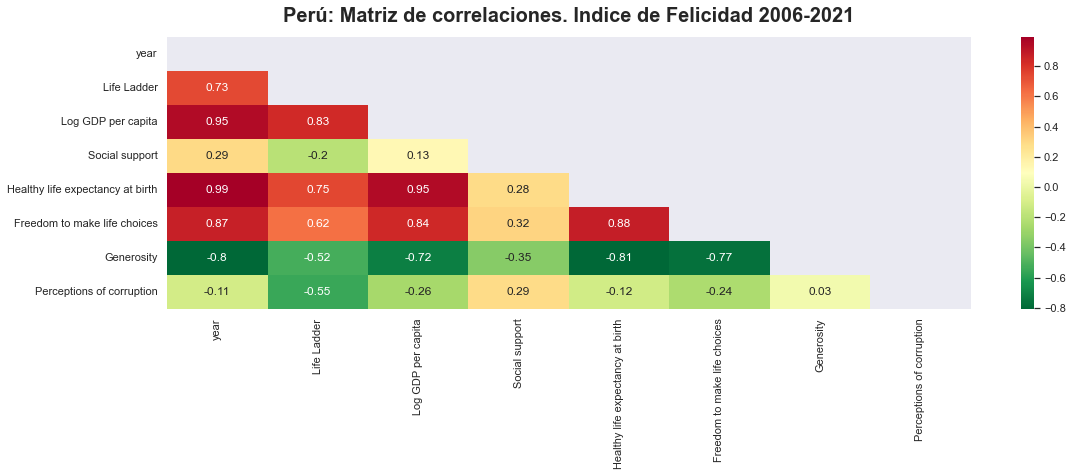

In [87]:
sns.set_style('darkgrid')
plt.figure(figsize=(18, 5))
sns.heatmap(peru.corr(), annot=True, cmap='RdYlGn_r',
            mask=np.triu(np.ones_like(peru.corr())))
plt.title('Perú: Matriz de correlaciones. Indice de Felicidad 2006-2021',
          fontsize=20, fontweight='bold', pad=15)

La matriz de correlaciones es un instrumento valioso para conocer que tan relacionadas están las variables asociadas (supuestamente explicativas) al Indice de Felicidad. Y lo que se tiene es que en el Perú el PBI percapita es la que tiene la mas alta correlación con la felicidad(0.83). ¿El dinero hace feliz a la gente?, al parecer sí. No obstante, es importante señalar que el PBI percápita no se distribuye de manera equitativa a toda la población, por lo que los felices no son todos. En segundo lugar, las expectativas de vida saludable tiene también una alta correlación con la felicidad (0.75), seguido un tamnto lejos por la Libertad de tomar decisones de vida (0.62). La Generosidad con -0.52 (signo contraio al esperado) pareciera indicar que en el Perú ser generosos nos hace "infelices".  El apoyo social con -0.2, tambien con signo contrario al esperado, indica que o es una variable irrelevante con especto a la felicidad, o el recibir ayuda nos hace infelices, algo que tendrían que evaluar nuestras autoridades con repecto a sus políticas sociales (¿Las tenenos?). Finalmente, es relevante que la percepción de corrupción tenga -0.55 de correlación con el Indice de Felicidad, ya que muestra la importancia de combatir ese flagelo en todas sus instancias a fin de tener un país más llevadero.

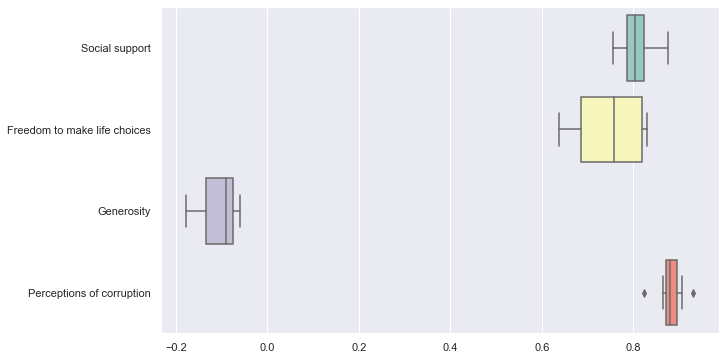

In [97]:
plt.figure(figsize=(10, 6))
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = peru.loc[:, list_features], orient = "h", palette = "Set3")
plt.show()

El gráfico anterior es una manera de ver que en el Perú hay mas consenso en cuanto a las percepciones de corrupción que a la libertad de tomar decisiones de vida, lo que podría ayudar a focalizar políticas.

In [22]:
peru.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2013.066667,5.610667,9.302400,0.804800,66.890000,0.744400,-0.106600,0.882533
std,4.589844,0.325661,0.156069,0.033311,0.979468,0.075832,0.039001,0.023400
min,2006.000000,4.811000,8.989000,0.756000,65.340000,0.638000,-0.178000,0.824000
25%,2009.500000,5.548000,9.181000,0.787000,66.180000,0.685500,-0.135000,0.872000
50%,2013.000000,5.701000,9.369000,0.803000,66.840000,0.757000,-0.090000,0.881000
75%,2016.500000,5.832500,9.430000,0.824500,67.650000,0.818500,-0.074500,0.895000
max,2021.000000,5.999000,9.461000,0.875000,68.400000,0.830000,-0.060000,0.931000


In [ ]:
plt.figure(figsize=(20, 7))

sns.set_style('whitegrid')
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=philippines)
boxplot.set(xlabel='', ylabel='')
plt.title("Total loaned in Philippines' sectors :", fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

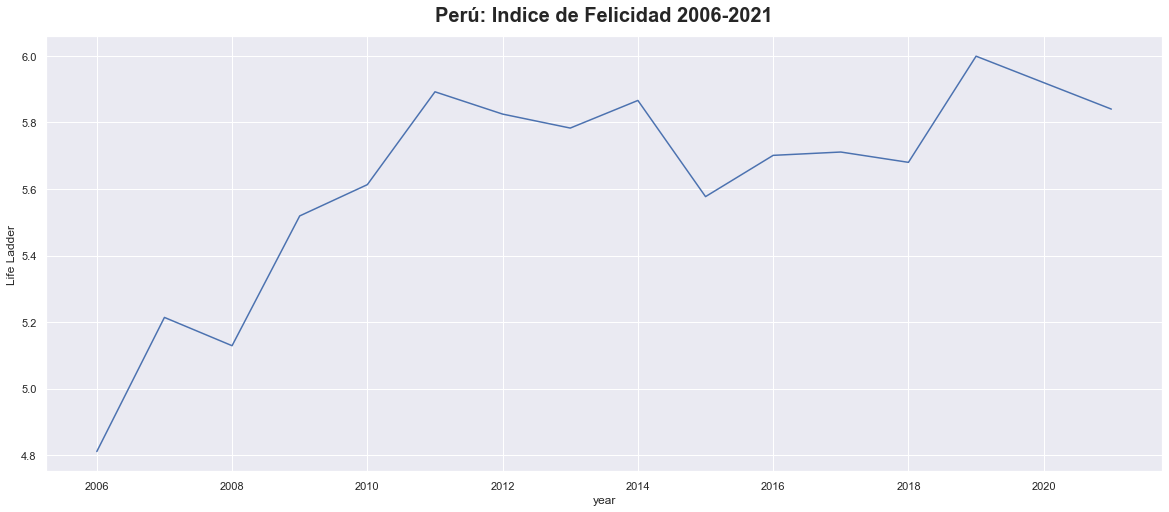

In [23]:
plt.figure(figsize=(20,8))
peru1 = peru.sort_values(by="year")
sns.lineplot(data=peru, x="year", y="Life Ladder");
plt.title('Perú: Indice de Felicidad 2006-2021', fontsize=20, fontweight='bold', pad=15);

El Indice de Felicidad en el Perú en el último quindenio. Nuestro peor momento el periodo 2006-2008 (herencia de Toledo y García), hubo una mejora hasta el 2011, un retroceso hasta el 2015 (cortesía Humala) y luego un repunte hasta el 2019 (PPK-Vizcarra), con la Pandemia vuelve a caer el score de felicidad.

No handles with labels found to put in legend.


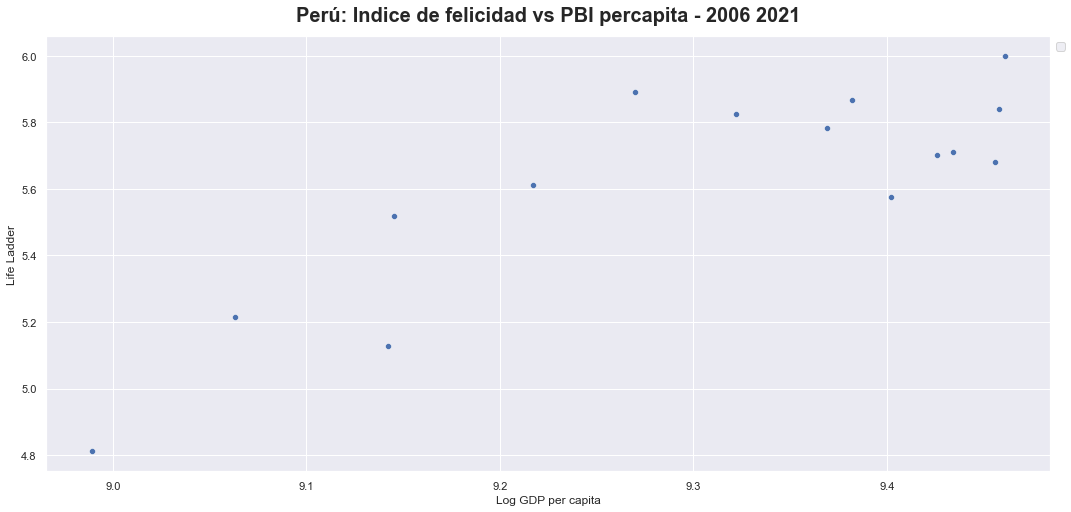

In [121]:
###### sns.set_style("darkgrid")
plt.figure(figsize=(18, 8))
sns.scatterplot(x="Log GDP per capita", y="Life Ladder", data=peru)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Perú: Indice de felicidad vs PBI percapita - 2006 2021', fontsize=20, fontweight='bold', pad=15);

No handles with labels found to put in legend.


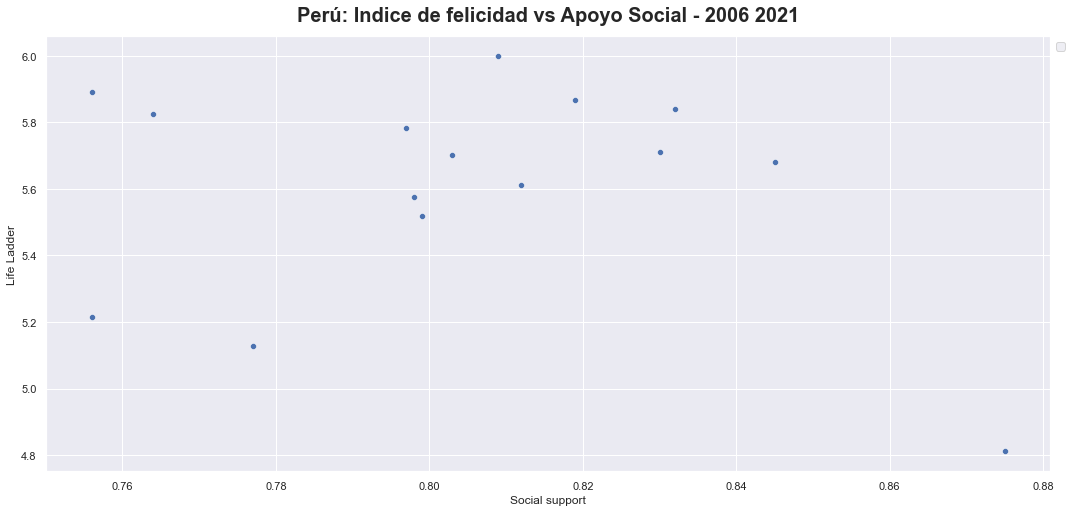

In [122]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x="Social support", y="Life Ladder", data=peru)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Perú: Indice de felicidad vs Apoyo Social - 2006 2021', fontsize=20, fontweight='bold', pad=15);

No handles with labels found to put in legend.


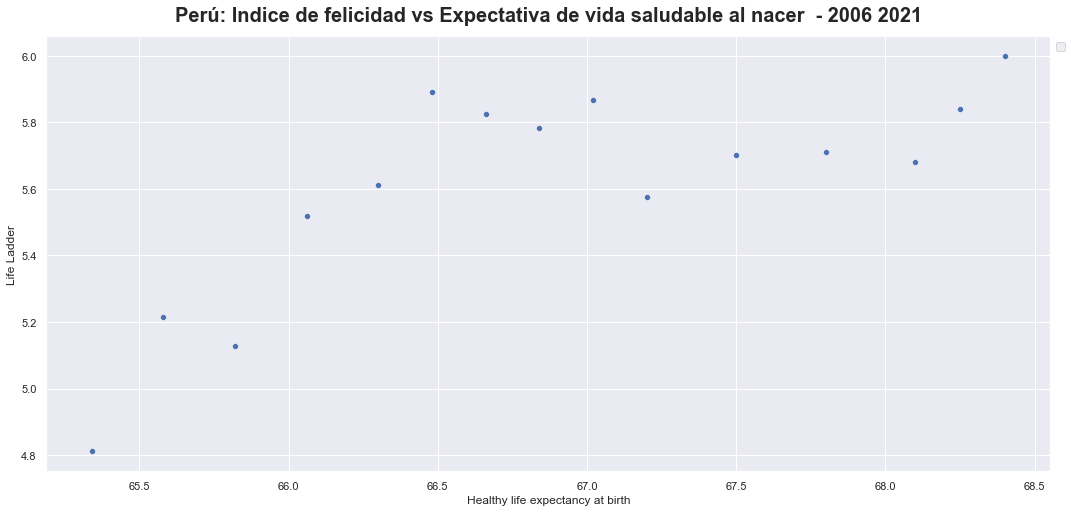

In [123]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x="Healthy life expectancy at birth", y="Life Ladder", data=peru)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Perú: Indice de felicidad vs Expectativa de vida saludable al nacer  - 2006 2021', fontsize=20, fontweight='bold', pad=15);

No handles with labels found to put in legend.


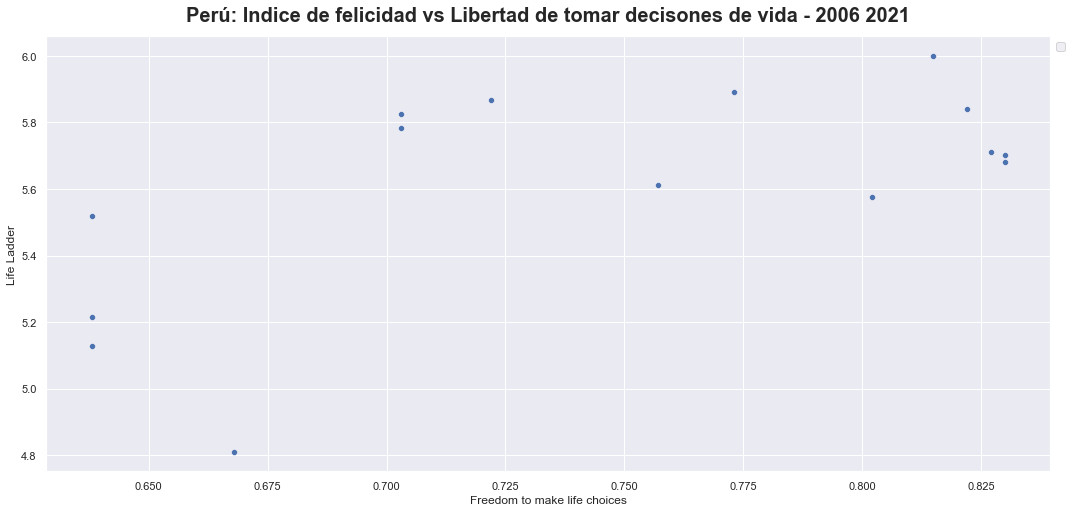

In [126]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x="Freedom to make life choices", y="Life Ladder", data=peru)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Perú: Indice de felicidad vs Libertad de tomar decisones de vida - 2006 2021', fontsize=20, fontweight='bold', pad=15);

No handles with labels found to put in legend.


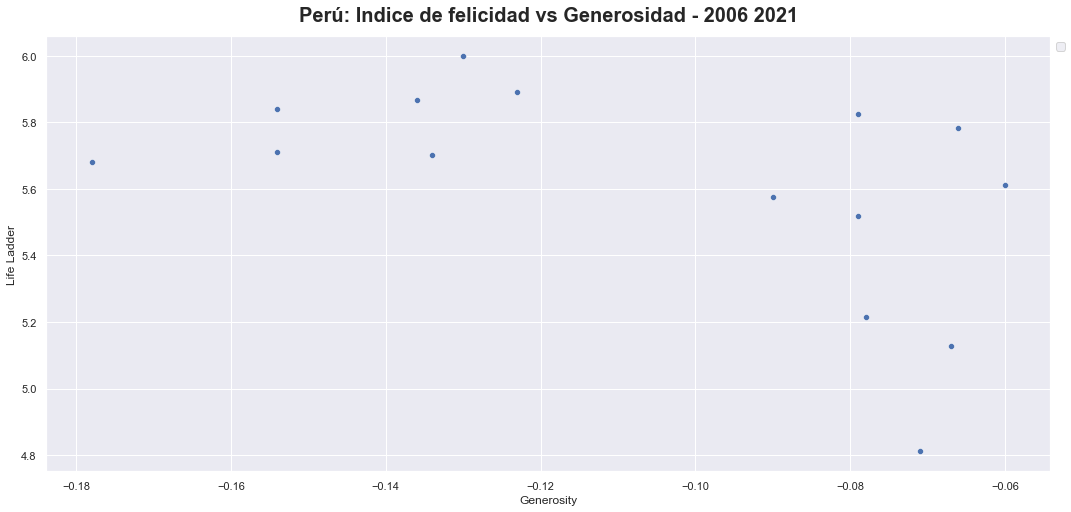

In [124]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x="Generosity", y="Life Ladder", data=peru)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Perú: Indice de felicidad vs Generosidad - 2006 2021', fontsize=20, fontweight='bold', pad=15);

No handles with labels found to put in legend.


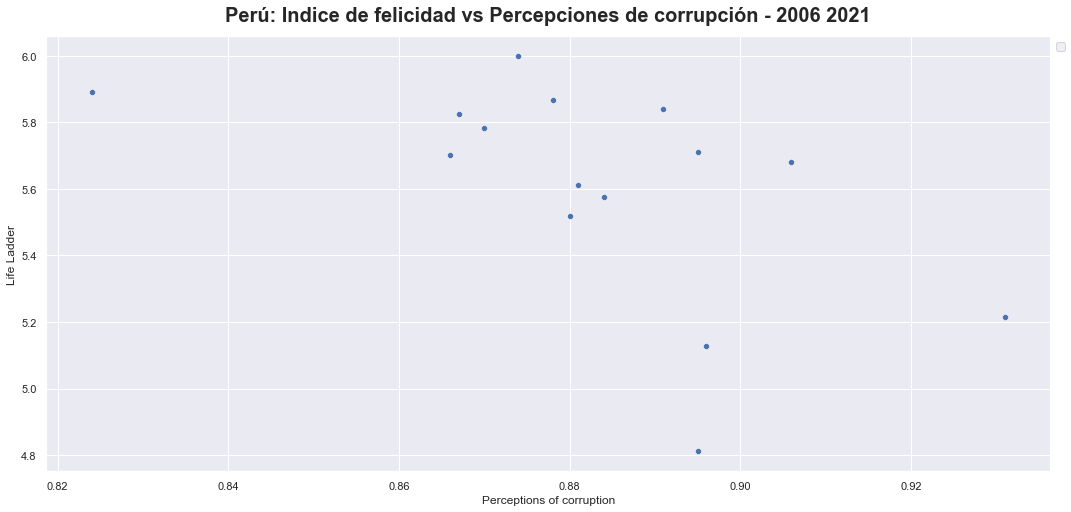

In [125]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x="Perceptions of corruption", y="Life Ladder", data=peru)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Perú: Indice de felicidad vs Percepciones de corrupción - 2006 2021', fontsize=20, fontweight='bold', pad=15);

## 5. Bonus: Trabajando con Formato Ancho - Mapa de Calor del Indice de Felicidad 

<div class =" alert alert-danger "> Transformando el dataframe LAC de formato largo a formato ancho. Ejemplo: Mapa de Calor del Indice de Felicidad en Sudamerica por paises</div> 

In [32]:
# Reduciendo el datafame a solo tres variables con fines de ejemplo.
LACW = LAC[['Country name','year', 'Life Ladder']]
LACW.head(20)

,Country name,year,Life Ladder
37,Argentina,2006,6.313
38,Argentina,2007,6.073
39,Argentina,2008,5.961
40,Argentina,2009,6.424
41,Argentina,2010,6.441
42,Argentina,2011,6.776
43,Argentina,2012,6.468
44,Argentina,2013,6.582
45,Argentina,2014,6.671
46,Argentina,2015,6.697


In [104]:
LACW1 = LACW.reset_index(drop = True)
LACW1.head()

,Country name,year,Life Ladder
0,Argentina,2006,6.313
1,Argentina,2007,6.073
2,Argentina,2008,5.961
3,Argentina,2009,6.424
4,Argentina,2010,6.441


In [113]:
LACW2 = pd.pivot_table(LACW1,values='Life Ladder',index='Country name',columns='year')
LACW2.style.background_gradient()

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country name,,,,,,,,,,,,,,,,,
Argentina,nan,6.313000,6.073000,5.961000,6.424000,6.441000,6.776000,6.468000,6.582000,6.671000,6.697000,6.427000,6.039000,5.793000,6.086000,5.901000,5.929000
Bolivia,nan,5.374000,5.628000,5.298000,6.086000,5.781000,5.779000,6.019000,5.767000,5.865000,5.834000,5.770000,5.651000,5.916000,5.674000,5.559000,5.716000
Brazil,6.637000,nan,6.321000,6.691000,7.001000,6.837000,7.038000,6.660000,7.140000,6.981000,6.547000,6.375000,6.333000,6.191000,6.451000,6.110000,6.330000
Chile,nan,6.063000,5.698000,5.789000,6.494000,6.636000,6.526000,6.599000,6.740000,6.844000,6.533000,6.579000,6.320000,6.436000,5.942000,6.151000,6.172000
Colombia,nan,6.025000,6.138000,6.168000,6.272000,6.408000,6.464000,6.375000,6.607000,6.449000,6.388000,6.234000,6.157000,5.984000,6.350000,5.709000,6.012000
Ecuador,nan,5.024000,4.996000,5.297000,6.022000,5.838000,5.795000,5.961000,6.019000,5.946000,5.964000,6.115000,5.840000,6.128000,5.809000,5.354000,5.764000
Paraguay,nan,4.730000,5.272000,5.570000,5.576000,5.841000,5.677000,5.820000,5.936000,5.119000,5.560000,5.801000,5.713000,nan,5.653000,nan,5.653000
Peru,nan,4.811000,5.214000,5.129000,5.519000,5.613000,5.892000,5.825000,5.783000,5.866000,5.577000,5.701000,5.711000,5.680000,5.999000,nan,5.840000
Uruguay,nan,5.786000,5.694000,5.664000,6.296000,6.062000,6.554000,6.450000,6.444000,6.561000,6.628000,6.171000,6.336000,6.372000,6.600000,6.310000,6.431000


#### Mapa de Calor del Indice de Felicidad en Sudamerica por paises 2005-2021

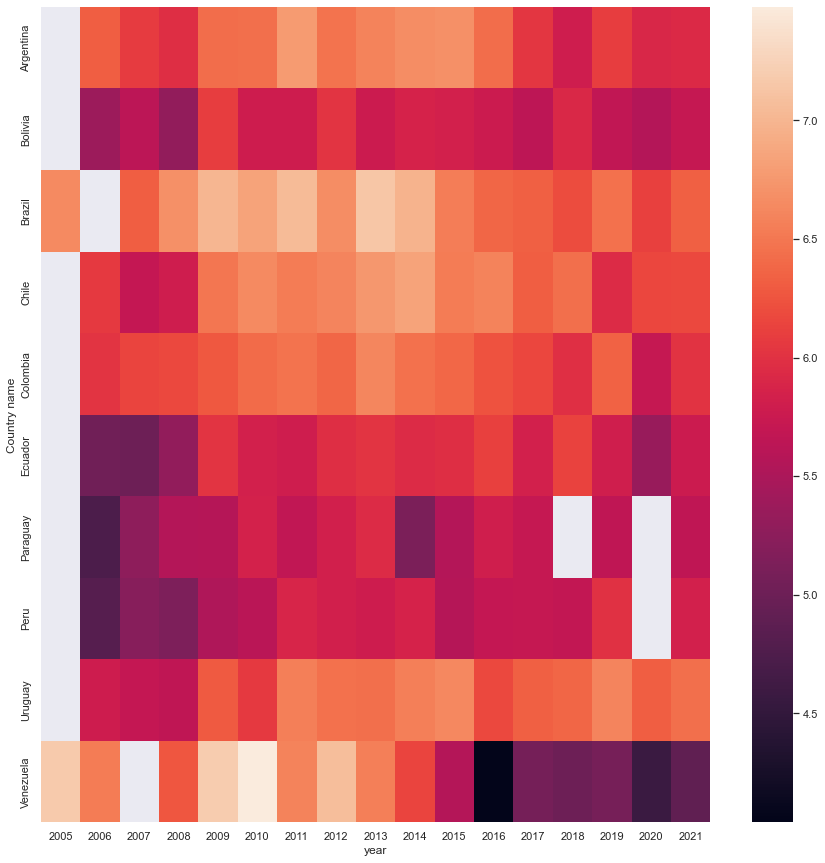

In [114]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(LACW2,ax=ax);

El Mapa de calir del Indice de felicidad por paises en el periodo 2006-2021 es otra manera de ver la evolución de dicho indicador en el tiempo. A más oscuridad menor índice. Así venos por ejemplo que paises Perú, Paraguay, Ecuador y Bolivia  tuvieron sus peores años al inicio del quindenio, mientras que Venezuela empieza a caer desde el 2015, paises como Brasil tienen una claridad envidiable.

## 6. Principales Hallazgos 

1.	El primer año de pandemia afectó en el Índice de Felicidad a todos los países en Sudamérica excepto Chile. En el segundo año todos, excepto Perú, mostraron recuperación.
2.	Al inicio del periodo de análisis la diferencia en el Índice de felicidad entre los países era más alta (entre el mayor y el menor), brecha que se ha venido reduciendo en el tiempo.
3.	En los últimos 15 años, medido por la media anual del Índice de felicidad, queda claro que Brasil es el país más “feliz” en Sudamérica (6.6), seguido por Chile (6.35), Argentina (6.29) y Uruguay (6.27). En el extremo opuesto están Perú (5.61) y Paraguay (5.57). Venezuela (5.95) se mantiene a mitad de tabla debido a sus buenos años iniciales, y con una caída estrepitosa desde el 2015.
4.	En Sudamérica las cifras muestran que los países con mayores índices de felicidad son también aquellos en donde este indicador presenta mayores fluctuaciones (intervalo mayor), tal es el caso de Brasil, Chile, Argentina y Uruguay. Y lo opuesto sucede con Perú, Paraguay y Bolivia los países con menor score y a la vez menor diferencia del índice durante el periodo. 
5.	Más dinero, mayor expectativa de vida, mayor libertad de tomar decisiones de vida y menor corrupción (en ese orden), es lo que está más asociado a la felicidad en el Perú. La generosidad y el apoyo social tendrían más bien el efecto contario. Interesantes temas para focalizar acciones, así como el hecho de que los datos soportan la idea de que habría más consenso en cuanto a las percepciones de corrupción que a las libertades de tomar decisiones (dato para los políticos y gobernantes).
6.	Si queremos identificar a la felicidad en el Perú según sus gobernantes, diríamos que nuestro peor momento fue el periodo 2006-2008 (herencia de Toledo y García), hubo una mejora hasta el 2011, un retroceso hasta el 2015 (cortesía de Humala) y luego un repunte hasta el 2019 (PPK-Vizcarra), con la Pandemia vuelve a caer el score de felicidad.
7. En la etapa de pandemia (estudio anterior), la variable de mayor correlación con el Indice de Felicidad era el porcentaje de población con dos vacunas, el PBI ocupaba el segundo lugar. 
